# Legislation datasets

### Dataset 1: domestic violence
There is legislation specifically addressing domestic violence (1=yes; 0=no)
Download: https://genderdata.worldbank.org/en/indicator/sg-leg-dvaw

The indicator measures whether there is legislation addressing domestic violence that includes criminal sanctions or provides for protection orders for domestic violence, or the legislation addresses "harassment" that clearly leads to physical or mental harm in the context of domestic violence.
(source: https://genderdata.worldbank.org/en/indicator/sg-leg-dvaw)

In [123]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 26 10:29:02 2025

@author: elske
"""

import pandas as pd

# Loading the datasets

import zipfile

zip_path = r".\datasets\there-is-legislation-specifically-addressing-domestic-violence-1-yes-0-no.zip"
dfs = []

with zipfile.ZipFile(zip_path, 'r') as z:
    print("Bestanden in ZIP:", z.namelist())

    for filename in z.namelist():
        if filename.endswith(".csv"): 
            with z.open(filename) as f:
                df = pd.read_csv(f)
                df["source_file"] = filename  
                dfs.append(df)

legis1 = pd.concat(dfs, ignore_index=True)

print(legis1.head())

Bestanden in ZIP: ['There is legislation specifically addressing domestic violence (1=yes; 0=no).csv', 'Contextual Indicators.csv', 'Metadata.csv']
                                      Indicator Name Indicator Code  \
0  There is legislation specifically addressing d...    SG.LEG.DVAW   
1  There is legislation specifically addressing d...    SG.LEG.DVAW   
2  There is legislation specifically addressing d...    SG.LEG.DVAW   
3  There is legislation specifically addressing d...    SG.LEG.DVAW   
4  There is legislation specifically addressing d...    SG.LEG.DVAW   

  Country Name Country Code    Year  Value Disaggregation  \
0  Afghanistan          AFG  2023.0    0.0            NaN   
1  Afghanistan          AFG  2022.0    0.0            NaN   
2  Afghanistan          AFG  2021.0    0.0            NaN   
3  Afghanistan          AFG  2020.0    0.0            NaN   
4  Afghanistan          AFG  2019.0    0.0            NaN   

                                         source_file  Aggr

### Dataset 2: sexual harassment in employment
Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no)
Download: https://genderdata.worldbank.org/en/indicator/sg-pen-sxhr-em 

The indicator measures whether the law establishes criminal sanctions, such as fines or imprisonment, for sexual harassment in employment; if the provision in the criminal code provides for reparation of damages for offenses covered by the code; or if the law provides for civil remedies or compensation for victims of sexual harassment in employment or the workplace, even after dismissal of the victims.
(source: https://genderdata.worldbank.org/en/indicator/sg-pen-sxhr-em 


In [124]:

zip_path = r".\datasets\SG.PEN.SXHR.EM.zip"
dfs = []

with zipfile.ZipFile(zip_path, 'r') as z:
    print("Bestanden in ZIP:", z.namelist())

    for filename in z.namelist():
        if filename.endswith(".csv"): 
            with z.open(filename) as f:
                df = pd.read_csv(f)
                df["source_file"] = filename  
                dfs.append(df)

legis2 = pd.concat(dfs, ignore_index=True)

print(legis2.head())


Bestanden in ZIP: ['Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no).csv', 'Contextual Indicators.csv', 'Metadata.csv']
                                      Indicator Name  Indicator Code  \
0  Criminal penalties or civil remedies exist for...  SG.PEN.SXHR.EM   
1  Criminal penalties or civil remedies exist for...  SG.PEN.SXHR.EM   
2  Criminal penalties or civil remedies exist for...  SG.PEN.SXHR.EM   
3  Criminal penalties or civil remedies exist for...  SG.PEN.SXHR.EM   
4  Criminal penalties or civil remedies exist for...  SG.PEN.SXHR.EM   

  Country Name Country Code    Year  Value Disaggregation  \
0  Afghanistan          AFG  2023.0    1.0            NaN   
1  Afghanistan          AFG  2022.0    1.0            NaN   
2  Afghanistan          AFG  2021.0    1.0            NaN   
3  Afghanistan          AFG  2020.0    1.0            NaN   
4  Afghanistan          AFG  2019.0    1.0            NaN   

                                    

### Background information:
Both datasets cover the period from 1970 to 2023, with the data being collected after the end of each year. Therefore, data labeled as 2023 actually refers to the previous year, 2022. The datasets include data from almost all countries worldwide, with a few exceptions such as Greenland, Turkmenistan and North Korea. Both datasets share the same structure, consisting of columns like country names and codes, years, the specific topic and a binary indicator of its presence (1 = yes, 0 = no).


### Data preprocessing
Since both datasets contained many columns with only missing data, we removed these columns. They were supposed to include information on definitions or general comments. For our analysis, removing these columns has no negative effect. In addition, the datasets contain a large amount of data related to topics that are not relevant to our analysis, such as water supply or mobile payments. All unnecessary data is removed from the datasets. To combine both topics of interest, the datasets were merged. Before this could be done, the column names of the binary outcomes were first renamed to reflect the corresponding topic and a selection was made of the columns to be analyzed. After merging the datasets, the resulting dataset contains 5 columns and 10,206 rows.

##### Checking on missing data

In [125]:

print(legis1.isna().sum())
print(legis2.isna().sum())

# Deleting all columns that contain mostly missing data

legis1_clean = legis1.dropna(axis=1, thresh=(len(legis1) - 10))
  
print(legis1_clean.shape)

legis2_clean = legis2.dropna(axis=1, thresh=(len(legis1) - 10))
  
print(legis2_clean.shape)



Indicator Name                              0
Indicator Code                              0
Country Name                                1
Country Code                                1
Year                                        1
Value                                       1
Disaggregation                          13216
source_file                                 0
Aggregation method                     190457
Dataset                                190457
General comments                       190456
License Type                           190456
License URL                            190456
Long definition                        190456
Periodicity                            190456
Reference period                       190457
Short definition                       190457
Source                                 190456
Topic                                  190456
Unit of measure                        190457
Related indicators                     190457
Development relevance             

##### Deleting all unnecessary data

In [126]:


legis1_clean = legis1_clean[legis1_clean["Indicator Name"] == 
                "There is legislation specifically addressing domestic violence (1=yes; 0=no)"]

print(legis1_clean.shape)
print(legis1_clean["Indicator Name"].unique())

legis2_clean = legis2_clean[legis2_clean["Indicator Name"] == 
                "Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no)"]

print(legis2_clean.shape)
print(legis2_clean["Indicator Name"].unique())


(10207, 7)
['There is legislation specifically addressing domestic violence (1=yes; 0=no)']
(10207, 7)
['Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no)']


##### Renaming Value columns to prepare for merging datasets

In [127]:

legis1_clean = legis1_clean.rename(columns={"Value" : "Legislation Domestic Violence"})

legis2_clean = legis2_clean.rename(columns={"Value" : "Legislation Sexual Harassment"})

##### Selecting columns of interest for merging datasets

In [128]:

legis1_clean = legis1_clean[["Country Name", "Country Code", "Year", "Legislation Domestic Violence"]]

legis2_clean = legis2_clean[["Country Name", "Country Code", "Year", "Legislation Sexual Harassment"]]

##### Merging the datasets 

In [129]:

 
legis_merged = legis2_clean.merge(
    legis1_clean[["Country Name", "Country Code", "Year", "Legislation Domestic Violence"]],
    on=["Country Code", "Year", "Country Name"],
    how="inner")

print(legis_merged.shape)
print(legis_merged.head)
print(legis_merged.isna().sum())

legis_merged = legis_merged.dropna()
print(legis_merged.shape)
print(legis_merged.isna().sum())


(10207, 5)
<bound method NDFrame.head of       Country Name Country Code    Year  Legislation Sexual Harassment  \
0      Afghanistan          AFG  2023.0                            1.0   
1      Afghanistan          AFG  2022.0                            1.0   
2      Afghanistan          AFG  2021.0                            1.0   
3      Afghanistan          AFG  2020.0                            1.0   
4      Afghanistan          AFG  2019.0                            1.0   
...            ...          ...     ...                            ...   
10202     Zimbabwe          ZWE  1973.0                            0.0   
10203     Zimbabwe          ZWE  1972.0                            0.0   
10204     Zimbabwe          ZWE  1971.0                            0.0   
10205     Zimbabwe          ZWE  1970.0                            0.0   
10206          NaN          NaN     NaN                            NaN   

       Legislation Domestic Violence  
0                              

### Exploring the data on a global level

To obtain an initial overview of the global introduction of legislation, we examined its development over time. To place this in historical perspective, the different feminist waves were incorporated into the plot. The figure shows that the growth in legislation began around 1995, a period that coincides with the third feminist wave.

At present, scholars generally distinguish four waves of feminism (Mohajan, H., 2022. Four waves of feminism: A blessing for global humanity). The first wave began in the early 19th century and primarily focused on issues such as women’s suffrage, access to education, and entry into certain professions. The second wave started in the 1980s and centered on matters such as contraception and abortion, sexual freedom, and labor rights. The third wave emerged in the 1990s, emphasizing gender in relation to race, class, and culture, rather than focusing solely on white women. The fourth wave began in 2012 and continues to the present, addressing online activism, violence against women, the #MeToo movement, and increased recognition of trans and non-binary individuals.

##### References:
Mohajan, H. (2022). Four waves of feminism: A blessing for global humanity. Munich Personal RePEc Archive (MPRA Paper No. 114328). https://mpra.ub.uni-muenchen.de/114328/ 

##### Number of countries with legislation in place per topic over time

In [130]:
legis_sum_per_year = legis_merged.groupby("Year")[["Legislation Sexual Harassment", "Legislation Domestic Violence"]].sum()
print(legis_year)

        Legislation Sexual Harassment  Legislation Domestic Violence
Year                                                                
1970.0                            2.0                            0.0
1971.0                            2.0                            0.0
1972.0                            2.0                            0.0
1973.0                            2.0                            0.0
1974.0                            2.0                            0.0
1975.0                            2.0                            0.0
1976.0                            2.0                            0.0
1977.0                            2.0                            0.0
1978.0                            2.0                            0.0
1979.0                            2.0                            0.0
1980.0                            2.0                            0.0
1981.0                            3.0                            0.0
1982.0                            

##### Plot Legislation Worldwide combined with feminist waves

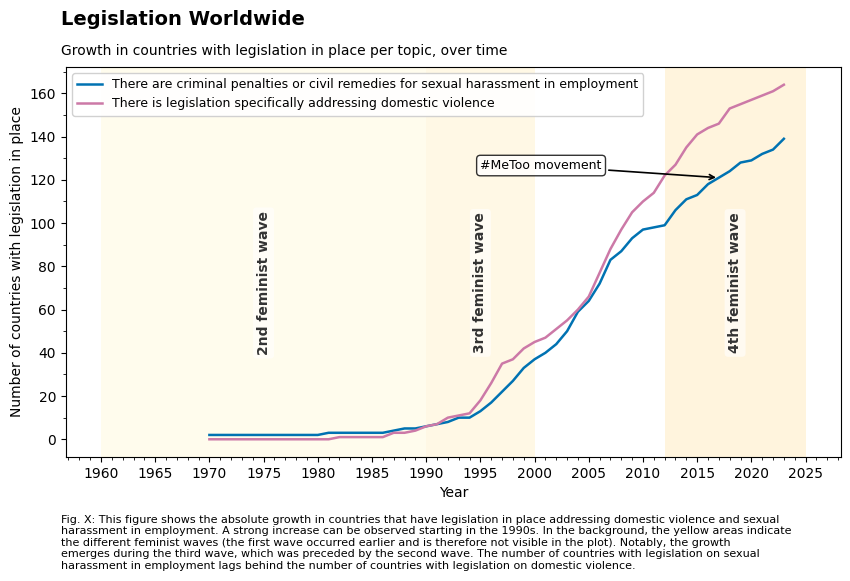

In [131]:

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def add_wave_band(ax, start, end, color, label, y_frac=0.55):
    ax.axvspan(start, end, color=color, alpha=0.22, linewidth=0, zorder=0.5)
    ax.text((start + end) / 2, ax.get_ylim()[1] * y_frac, label,
            ha="center", va="center", rotation=90, fontsize=10, fontweight="bold",
            color="#333333",
            bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="none", alpha=0.6),
            zorder=1.0)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    legis_sum_per_year.index,
    legis_sum_per_year["Legislation Sexual Harassment"],
    color="#0072B2", linestyle="-", linewidth=1.8,
    label="There are criminal penalties or civil remedies for sexual harassment in employment"
)
ax.plot(
    legis_sum_per_year.index,
    legis_sum_per_year["Legislation Domestic Violence"],
    color="#CC79A7", linestyle="-", linewidth=1.8,
    label="There is legislation specifically addressing domestic violence"
)

ax.set_xlabel("Year")
ax.set_ylabel("Number of countries with legislation in place")
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(10))

gold1 = "#FFF3B0"  
gold2 = "#FFE08A"  
gold3 = "#FFD166"  
add_wave_band(ax, 1960, 1990, gold1, "2nd feminist wave", y_frac=0.42)
add_wave_band(ax, 1990, 2000, gold2, "3rd feminist wave",  y_frac=0.42)
add_wave_band(ax, 2012, 2025, gold3, "4th feminist wave", y_frac=0.42)

ax.annotate(
    "#MeToo movement",
    xy=(2017, legis_sum_per_year.loc[2017, "Legislation Sexual Harassment"]),
    xytext=(1995, 125),
    arrowprops=dict(arrowstyle="->", color="black", lw=1.2),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8),
    fontsize=9, ha="left"
)

ax.legend(loc="upper left", frameon=True, framealpha=0.9, fontsize=9)
fig.text(0.12, 0.97, "Legislation Worldwide", ha="left", fontsize=14, weight="bold")
fig.text(0.12, 0.92, "Growth in countries with legislation in place per topic, over time",
         ha="left", fontsize=10)

import textwrap

caption = ("Fig. X: This figure shows the absolute growth in countries that have legislation in place "
           "addressing domestic violence and sexual harassment in employment. A strong increase can be "
           "observed starting in the 1990s. In the background, the yellow areas indicate the different "
           "feminist waves (the first wave occurred earlier and is therefore not visible in the plot). "
           "Notably, the growth emerges during the third wave, which was preceded by the second wave. "
           "The number of countries with legislation on sexual harassment in employment lags behind "
           "the number of countries with legislation on domestic violence.")

wrapped_caption = "\n".join(textwrap.wrap(caption, width=130))  
fig.text(0.12, 0.06, wrapped_caption,
         ha="left", va="bottom", fontsize=8)

plt.subplots_adjust(top=0.90, bottom=0.25)
plt.show()


### Exploring the data on a regional level


The heatmap on domestic violence legislation demonstrates that the introduction of such laws first began in North and South America. Europe and Asia followed thereafter, with Asia remaining below 80 percent of countries adopting legislation. In Africa, legislation was introduced the latest and the proportion of countries with legislation in place still lags behind other regions today. Notably, in Oceania, legislation emerged relatively late, yet around 2015 a remarkable acceleration occurred, resulting in 100 percent of the countries in this dataset having domestic violence legislation in place.

An interesting avenue for further investigation would be to examine the UN General Debate transcripts to determine whether the initial impetus for legislation in North and South America around 1995 can be traced in those discussions and whether references can be found to the developments around 2015 in Oceania that might explain this rapid increase.

Legislation addressing sexual harassment in employment lags behind that of domestic violence. In North America, however, it began to emerge around the same period (1995), while other regions followed later, with Europe taking the lead in this area. Africa also lags behind, but strikingly, this is even more pronounced in Asia and Oceania. The catch-up observed in Oceania with regard to domestic violence legislation is not reflected in the field of sexual harassment in employment.

##### Add extra column with continents

In [132]:
!pip install pycountry pycountry-convert


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [133]:
import pycountry
import pycountry_convert as pc

def alpha3_to_continent(alpha3):
    try:
        country = pycountry.countries.get(alpha_3=alpha3)
        alpha2 = country.alpha_2
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

legis_merged["Continent"] = legis_merged["Country Code"].apply(alpha3_to_continent)

print(legis_merged)

      Country Name Country Code    Year  Legislation Sexual Harassment  \
0      Afghanistan          AFG  2023.0                            1.0   
1      Afghanistan          AFG  2022.0                            1.0   
2      Afghanistan          AFG  2021.0                            1.0   
3      Afghanistan          AFG  2020.0                            1.0   
4      Afghanistan          AFG  2019.0                            1.0   
...            ...          ...     ...                            ...   
10201     Zimbabwe          ZWE  1974.0                            0.0   
10202     Zimbabwe          ZWE  1973.0                            0.0   
10203     Zimbabwe          ZWE  1972.0                            0.0   
10204     Zimbabwe          ZWE  1971.0                            0.0   
10205     Zimbabwe          ZWE  1970.0                            0.0   

       Legislation Domestic Violence Continent  
0                                0.0      Asia  
1            

##### Creating heatmaps with % of countries per region having legislation in place, over time

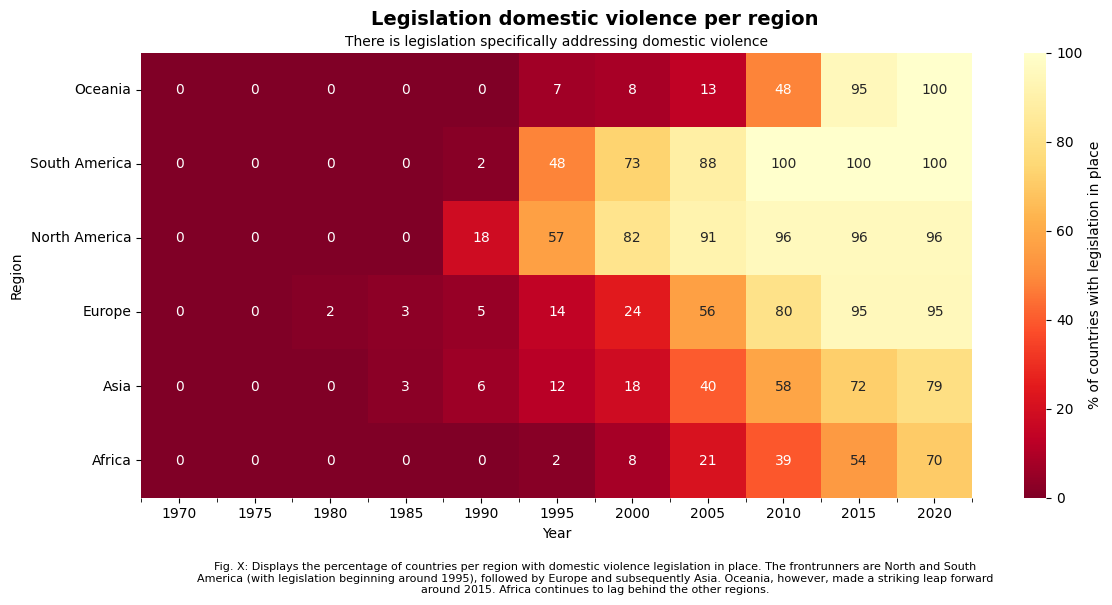

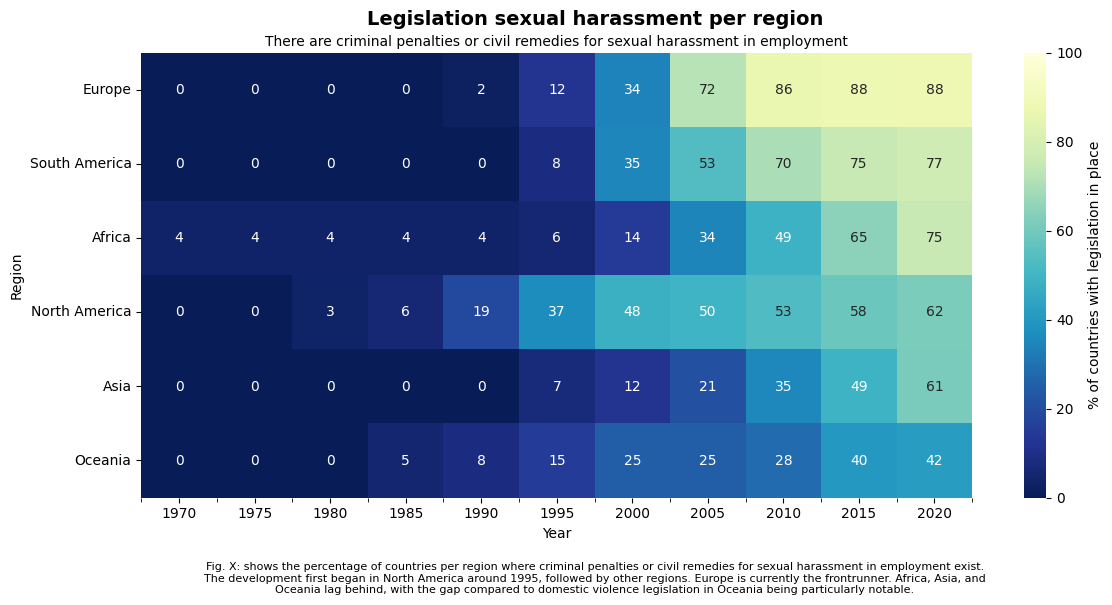

In [134]:

import seaborn as sns
from matplotlib.ticker import MultipleLocator
import textwrap

def heatmap(df, value_col, main_title, subtitle, cmap, caption=None):
    p = df.pivot(index="Continent", columns="Year5", values=value_col)

    order = (p.apply(lambda r: r.dropna().iloc[-1] if r.dropna().size else float("nan"), axis=1)
               .sort_values(ascending=False).index)
    p = p.loc[order]

    fig, ax = plt.subplots(figsize=(12,6))
    sns.heatmap(
        p, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
        cbar_kws={"label": "% of countries with legislation in place"},
        ax=ax
    )

    fig.suptitle(main_title, fontsize=14, fontweight="bold", y=0.91, ha="center")
    ax.set_title(subtitle, fontsize=10, loc="center", pad=5)

    ax.set_xlabel("Year")
    ax.set_ylabel("Region")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.tick_params(axis="x", which="minor", length=3)

    if caption:
        wrapped = "\n".join(textwrap.wrap(caption, width=140))  
        fig.text(0.5, -0.01, wrapped, ha="center", va="top", fontsize=8)

    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

heatmap(
    agg, "dv_pct",
    main_title="Legislation domestic violence per region",
    subtitle="There is legislation specifically addressing domestic violence",
    cmap="YlOrRd_r",
    caption=("Fig. X: Displays the percentage of countries per region with domestic violence legislation in place. "
             "The frontrunners are North and South America (with legislation beginning around 1995), followed by "
             "Europe and subsequently Asia. Oceania, however, made a striking leap forward around 2015. "
             "Africa continues to lag behind the other regions.")
)

heatmap(
    agg, "sh_pct",
    main_title="Legislation sexual harassment per region",
    subtitle="There are criminal penalties or civil remedies for sexual harassment in employment",
    cmap="YlGnBu_r",
    caption="Fig. X: shows the percentage of countries per region where criminal penalties or civil remedies for sexual harassment in employment exist. The development first began in North America around 1995, followed by other regions. Europe is currently the frontrunner. Africa, Asia, and Oceania lag behind, with the gap compared to domestic violence legislation in Oceania being particularly notable."
)
